In [13]:
import pandas as pd
import numpy as np

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
%matplotlib inline 

In [19]:
df = pd.read_csv("ALARMS_CLEANED.csv")

In [21]:
df.head()

,Unnamed: 0,Unnamed: 1,13/01/2024,14/01/2025,15/01/2025,16/01/2025,17/01/2025,18/01/2025,19/01/2025,20/01/2025,21/01/2025,22/01/2025,23/01/2025,24/01/2025,25/01/2025,26/01/2025,Unnamed: 16
0,Room_Codes,Rooms,Count_13,Count_14,Count_15,Count_16,Count_17,Count_18,Count_19,Count_20,Count_21,Count_22,Count_23,Count_24,Count_25,Count_26,NaN
1,570ca,672376234e098298d5a570ca,18,26,30,14,5,14,0,0,0,0,0,0,0,0,NaN
2,570ce,672376234e098298d5a570ce,10,31,72,29,49,19,24,53,21,26,77,5,4,13,NaN
3,570cf,672376234e098298d5a570cf,37,21,32,25,19,0,0,7,26,19,17,14,9,10,NaN
4,570d0,672376234e098298d5a570d0,51,33,29,49,8,0,10,51,54,49,60,14,36,3,NaN


In [23]:
df_cleaned = df.iloc[1:].reset_index(drop=True)

In [25]:
df_cleaned.columns = ["Room_Code", "Rooom_ID"] + list(df.columns[2:])

In [29]:
date_columns = df_cleaned.columns[2:]
df_cleaned[date_columns] = df_cleaned[date_columns].apply(pd.to_numeric, errors="coerce")

In [31]:
df_cleaned["Fluctuation"] = df_cleaned[date_columns].std(axis=1)

In [33]:
df_top5 = df_cleaned.head(5)

In [35]:
df_top5 = df_top5.dropna(subset=["Fluctuation"])
df_top5["Fluctuation"] = df_top5["Fluctuation"].astype(float)

In [37]:
plt.figure(figsize=(7, 7))
plt.pie(df_top5["Fluctuation"], labels=df_top5["Room_Code"], autopct="%1.1f%%", startangle=140) 
plt.title("Fluctuation Distribution of Alarm Counts (First 5 Rooms)")

Text(0.5, 1.0, 'Fluctuation Distribution of Alarm Counts (First 5 Rooms)')

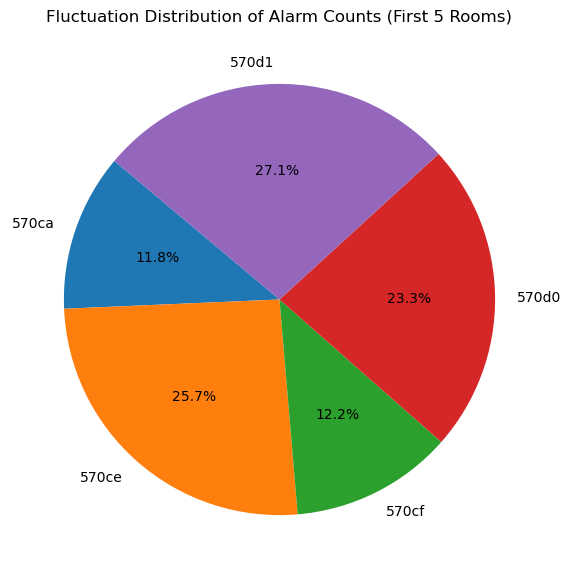

In [39]:
plt.show()

In [125]:
january_2025_filtered_columns = [col for col in date_columns if col.endswith("2025") and col.startswith(("12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26"))]

In [127]:
average_alarm_per_room_per_day_filtered = df_cleaned[january_2025_filtered_columns].mean()

In [129]:
average_alarm_per_room_per_day_filtered.index = pd.to_datetime(average_alarm_per_room_per_day_filtered.index, format="%d/%m/%Y")

In [131]:
fig = px.line(x=average_alarm_per_room_per_day_filtered.index,
             y=average_alarm_per_room_per_day_filtered.values, 
             title="Trend of Average Alarm Count Per Room Per Day(January 13th-26th, 2025)",
              labels={"x": "Date", "y": "Average Alarm Count per Room"},
              markers=True)

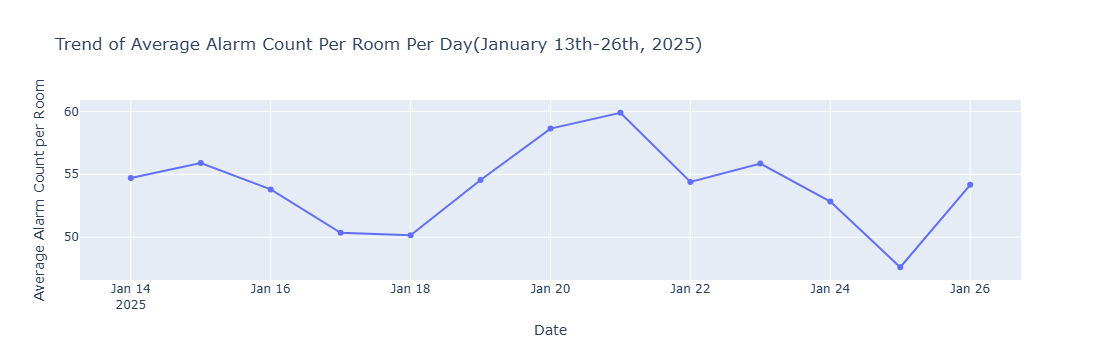

In [135]:
fig.show()

In [137]:
df_cleaned["Fluctuation"] = df_cleaned[date_columns].std(axis=1)

In [139]:
df_top5_fluctuations = df_cleaned.nlargest(5, "Fluctuation")

In [141]:
january_2025_filtered_columns = [col for col in date_columns if col.endswith("2025") and col.startswith(("13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26"))]

In [143]:
df_melted_top5 = df_top5_fluctuating.melt(id_vars=["Room_Code"], value_vars=january_2025_filtered_columns, var_name="Date", value_name="Alarm_Count")

In [145]:
df_melted_top5["Date"] = pd.to_datetime(df_melted_top5["Date"], format="%d/%m/%Y", errors="coerce")

In [147]:
fig = px.line(df_melted_top5, 
             x="Date", 
             y="Alarm_Count",
             color="Room_Code",
             title="Top 5 Fluctuating Rooms -Alarm Count (January 13th-26th, 2025)", 
             labels={"Alarm_Count": "Number of Alarms", "Date": "Date", "Room_Code": "Room Code"}, 
             markers=True)

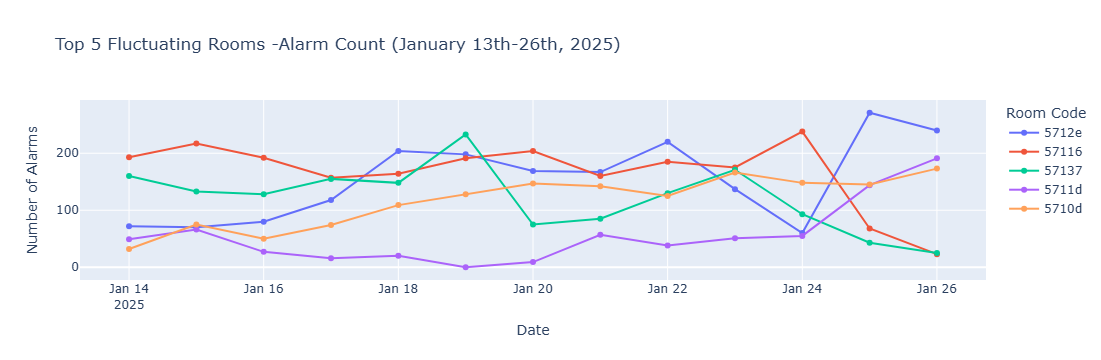

In [153]:
fig.show()

In [3]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
%matplotlib inline

In [9]:
df = pd.read_csv("ALARMS_CLEANED.csv")

In [11]:
df.head()

,Unnamed: 0,Unnamed: 1,13/01/2024,14/01/2025,15/01/2025,16/01/2025,17/01/2025,18/01/2025,19/01/2025,20/01/2025,21/01/2025,22/01/2025,23/01/2025,24/01/2025,25/01/2025,26/01/2025,Unnamed: 16
0,Room_Codes,Rooms,Count_13,Count_14,Count_15,Count_16,Count_17,Count_18,Count_19,Count_20,Count_21,Count_22,Count_23,Count_24,Count_25,Count_26,NaN
1,570ca,672376234e098298d5a570ca,18,26,30,14,5,14,0,0,0,0,0,0,0,0,NaN
2,570ce,672376234e098298d5a570ce,10,31,72,29,49,19,24,53,21,26,77,5,4,13,NaN
3,570cf,672376234e098298d5a570cf,37,21,32,25,19,0,0,7,26,19,17,14,9,10,NaN
4,570d0,672376234e098298d5a570d0,51,33,29,49,8,0,10,51,54,49,60,14,36,3,NaN


In [13]:
df_cleaned = df.iloc[3:, :].copy()
df_cleaned.columns = df.iloc[2, :].tolist()
df_cleaned = df_cleaned.rename(columns={df_cleaned.columns[1]: "Room_Code"})
df_cleaned = df_cleaned.iloc[:, 1:].reset_index(drop=True)

In [15]:
for col in df_cleaned.columns[1:]:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors="coerce")


In [17]:
df_cleaned["Total_Alarms"] = df_cleaned.iloc[:, 1:].sum(axis=1)

In [20]:
top_20_rooms = df_cleaned[["Room_Code", "Total_Alarms"]].dropna().nlargest(20, "Total_Alarms")

In [22]:
top_20_rooms = top_20_rooms.sort_values(by="Total_Alarms", ascending=True)

In [48]:
fig = px.bar(top_20_rooms, x="Room_Code", y="Total_Alarms", 
            title="Top 20 rooms with Highest Alarm Counts", 
            labels={"Room_Code": "Room Code", "Total_Alarms": "Total Alarm Count"},
            color="Total_Alarms",
            color_continuous_scale="Blues",
            height=800,
            width=1200)

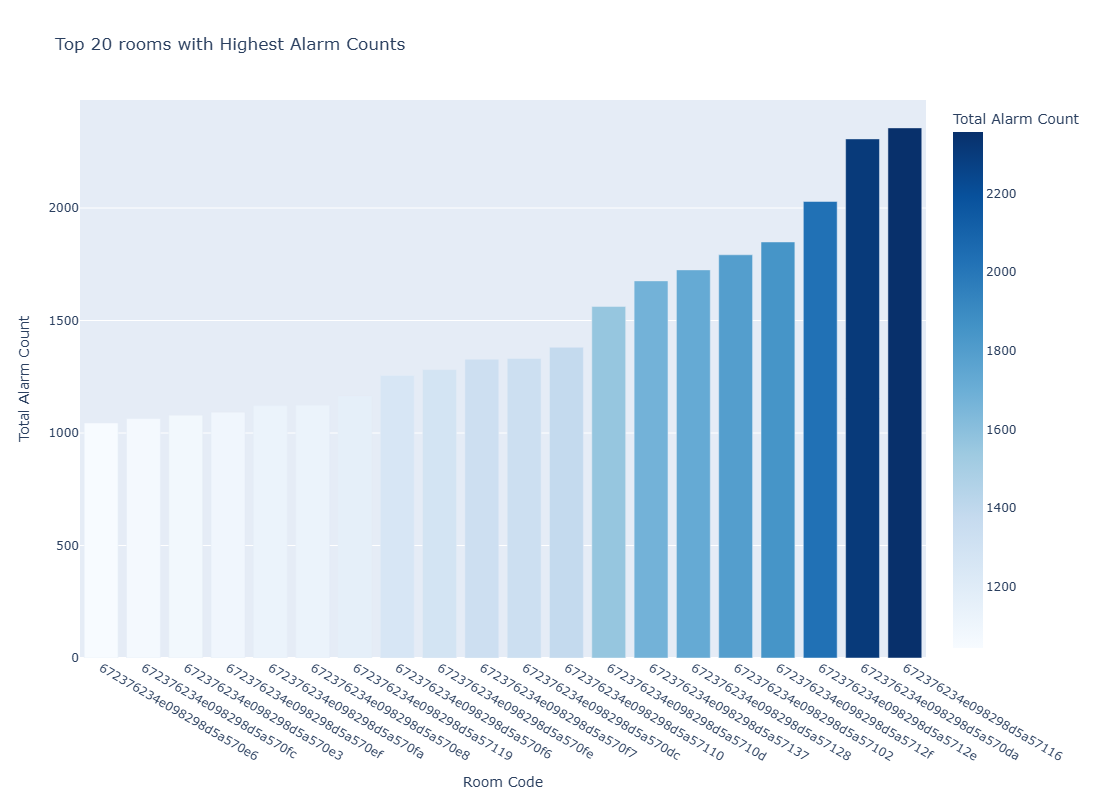

In [40]:
fig.show()

In [192]:
df_cleaned = df.iloc[1:, :].copy()
df_cleaned.columns = df.iloc[0]
df_cleaned = df_cleaned.iloc[1:, :]
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains("Unnamed", na=False)]

In [194]:
date_columns = df_cleaned.columns[2:]
df_cleaned[date_columns] = df_cleaned[date_columns].apply(pd.to_numeric, errors="coerce")
df_cleaned["Fluctuation"] = df_cleaned[date_columns].std(axis=1)

In [198]:
top_fluctuating = df_cleaned.nlargest(10, "Fluctuation").copy()
top_stable = df_cleaned.nsmallest(10, "Fluctuation").copy()

In [200]:
df_cleaned.rename(columns={df_cleaned.columns[0]: "Rooms"}, inplace=True)
top_fluctuating.rename(columns={top_fluctuating.columns[0]: "Rooms"}, inplace=True)
top_stable.rename(columns={top_stable.columns[0]: "Rooms"}, inplace=True)

In [202]:
top_fluctuating["Category"] = "Fluctuating"
top_stable["Category"] = "Stable"

In [214]:
combined = pd.concat([top_fluctuating, top_stable])
combined = combined[["Rooms", "Fluctuation", "Category"]]
combined.dropna(inplace=True)
combined["Fluctuation"] = combined["Fluctuation"].astype(float)
combined["Rooms"] = combined["Rooms"].astype(str)

In [216]:
print(combined.columns)
print(combined.dtypes)
print(combined.head())

Index(['Rooms', 'Rooms', 'Fluctuation', 'Category'], dtype='object', name=0)
0
Rooms           object
Rooms           object
Fluctuation    float64
Category        object
dtype: object
0   Rooms                     Rooms  Fluctuation     Category
90  5712e  672376234e098298d5a5712e    76.438476  Fluctuating
67  57116  672376234e098298d5a57116    57.063296  Fluctuating
99  57137  672376234e098298d5a57137    54.612521  Fluctuating
73  5711d  672376234e098298d5a5711d    52.307418  Fluctuating
59  5710d  672376234e098298d5a5710d    47.011806  Fluctuating


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("ALARMS_CLEANED.csv")

In [7]:
df.head()

,Unnamed: 0,Unnamed: 1,13/01/2024,14/01/2025,15/01/2025,16/01/2025,17/01/2025,18/01/2025,19/01/2025,20/01/2025,21/01/2025,22/01/2025,23/01/2025,24/01/2025,25/01/2025,26/01/2025,Unnamed: 16
0,Room_Codes,Rooms,Count_13,Count_14,Count_15,Count_16,Count_17,Count_18,Count_19,Count_20,Count_21,Count_22,Count_23,Count_24,Count_25,Count_26,NaN
1,570ca,672376234e098298d5a570ca,18,26,30,14,5,14,0,0,0,0,0,0,0,0,NaN
2,570ce,672376234e098298d5a570ce,10,31,72,29,49,19,24,53,21,26,77,5,4,13,NaN
3,570cf,672376234e098298d5a570cf,37,21,32,25,19,0,0,7,26,19,17,14,9,10,NaN
4,570d0,672376234e098298d5a570d0,51,33,29,49,8,0,10,51,54,49,60,14,36,3,NaN


In [31]:
df_cleaned = df.iloc[1:].reset_index(drop=True)
df_cleaned.columns = ["Room_Codes", "Rooms"] + list(df.columns[2:])

In [33]:
for col in df_cleaned.columns[2:]:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors="coerce")

In [35]:
df_cleaned["Varience"] = df_cleaned.iloc[:, 2:].var(axis=1)

In [37]:
fluctuating_rooms = df_cleaned.nlargest(10, "Varience")
stable_rooms = df_cleaned.nsmallest(10, "Varience")

In [39]:
fluctuating_avg = fluctuating_rooms.iloc[:, 2: -1].mean(axis=1)
stable_avg = stable_rooms.iloc[:, 2: -1].mean(axis=1)

In [41]:
fluctuating_room_codes = fluctuating_rooms["Room_Codes"].tolist()
stable_room_codes = stable_rooms["Room_Codes"].tolist()

In [43]:
plt.figure(figsize=(14, 6))
bar_width = 0.4
indices = np.arange(10)

<Figure size 1400x600 with 0 Axes>

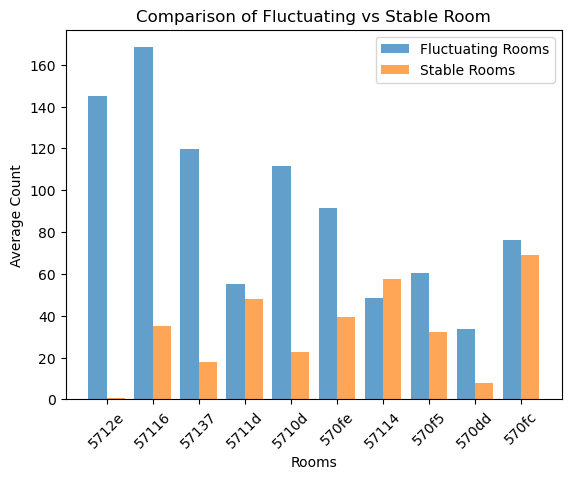

In [45]:
plt.bar(indices, fluctuating_avg, bar_width, label="Fluctuating Rooms", alpha=0.7)
plt.bar(indices + bar_width, stable_avg, bar_width, label="Stable Rooms", alpha=0.7)

plt.xlabel("Rooms")
plt.ylabel("Average Count")
plt.title("Comparison of Fluctuating vs Stable Room")
plt.xticks(indices + bar_width / 2, fluctuating_room_codes, rotation=45)
plt.legend()
plt.show()